<a href="https://colab.research.google.com/github/Keehojeong/2020-2-AI/blob/master/code/06_neuron_activation_dense.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [36]:
import tensorflow as tf
tf.__version__

'2.3.0'

# 활성화 함수

In [37]:
import numpy as np
np.e

2.718281828459045

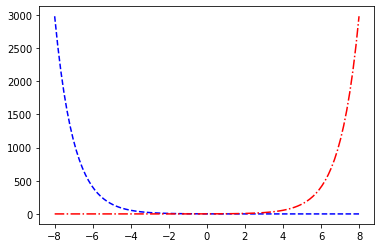

In [38]:
import numpy as np
import matplotlib.pylab as plt

plt.figure(figsize = (6, 4))
x = np.linspace(-8, 8, 100)
plt.plot(x, np.exp(-x), 'b--')
_= plt.plot(x, np.exp(x), 'r-.')

# 시그모이드 함수

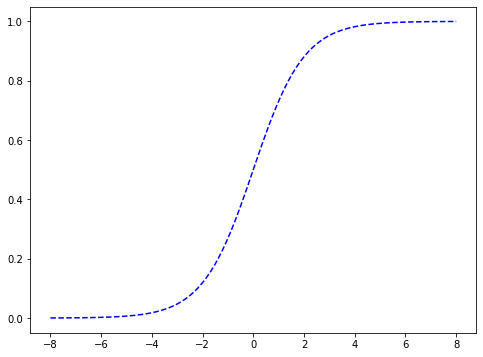

In [39]:
import numpy as np
import matplotlib.pyplot as plt

def sigm_func(x):  # sigmoid 함수
    return 1 / ( 1 + np.exp(-x))

# 시그모이드 함수 그리기
plt.figure(figsize=(8, 6))
x = np.linspace(-8, 8, 100)
plt.plot(x, sigm_func(x), 'b--')

# ReLU 함수

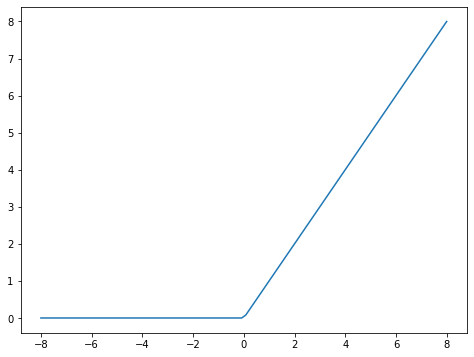

In [40]:
import numpy as np
import matplotlib.pyplot as plt

def relu_func(x):  # ReLU(Rectified Linear Unit, 정류된 선형 유닛) 함수
    return np.maximum(0, x)
    #return (x>0)*x   # same

# ReLU 함수 그리기
plt.figure(figsize=(8, 6))
x = np.linspace(-8, 8, 100)
plt.plot(x, relu_func(x))

# 시그모이드 ReLU 함께 그리기

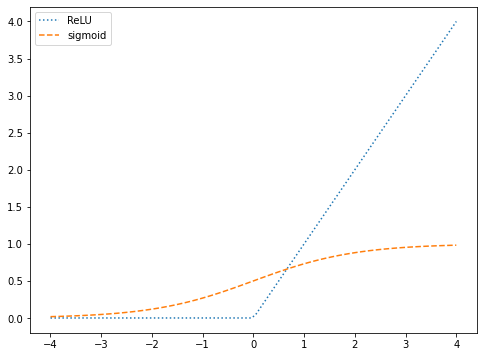

In [41]:
import numpy as np
import matplotlib.pyplot as plt

# ReLU(Rectified Linear Unit, 정류된 선형 유닛) 함수
def relu_func(x):
    return np.maximum(0, x)
    #return (x>0)*x   # same

def sigm_func(x):  # sigmoid 함수
    return 1 / ( 1 + np.exp(-x))

# 그래프 그리기
plt.figure(figsize=(8, 6))
x = np.linspace(-4, 4, 100)
y = np.linspace(-0.2, 2, 100)

plt.plot(x, relu_func(x), linestyle=':', label="ReLU")
plt.plot(x, sigm_func(x), linestyle='--', label="sigmoid")
plt.legend(loc='upper left')

# 다양한 활성화 함수

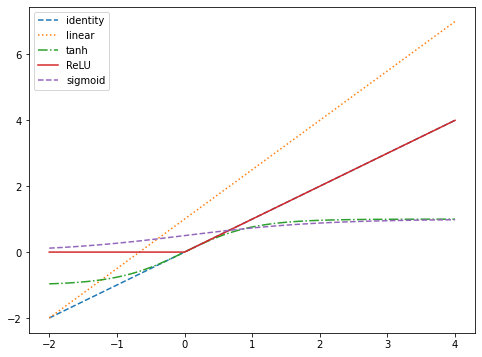

In [42]:
import numpy as np
import matplotlib.pyplot as plt

def identity_func(x):  #항등함수
    return x

def linear_func(x):   # 1차 함수
    return 1.5 * x + 1    #  a 기울기(1.5),  y절편b(1) 조정가능

def tanh_func(x):    # TanH 함수
    return np.tanh(x)

def relu_func(x):   # ReLU(Rectified Linear Unit, 정류된 선형 유닛) 함수
    return np.maximum(0, x)
    #return (x>0)*x   # same

def sigm_func(x):  # sigmoid 함수
    return 1 / ( 1 + np.exp(-x))

# 그래프 그리기
plt.figure(figsize=(8, 6))
x = np.linspace(-2, 4, 100)

plt.plot(x, identity_func(x), linestyle='--', label="identity")
plt.plot(x, linear_func(x), linestyle=':', label="linear")
plt.plot(x, tanh_func(x), linestyle='-.', label="tanh")
plt.plot(x, relu_func(x), linestyle='-', label="ReLU")
plt.plot(x, sigm_func(x), linestyle='--', label="sigmoid")
plt.legend(loc='upper left')

# 뉴련의 행렬 연산

In [43]:
x = [[1, 2]]
w = [[1, 2, 3], [4, 5, 6]]

y = tf.matmul(x, w)
y.numpy()

array([[ 9, 12, 15]], dtype=int32)

# 특징 2, 샘플 수 4개의 행렬 연산

In [44]:
x = [[6, 5]]
w = [[1, 2, 3], [4, 5, 6]]

y = tf.matmul(x, w)
y.numpy()

array([[26, 37, 48]], dtype=int32)

In [45]:
x = [[6, 5], [4, 7], [5, 6], [6, 7]]
w = [[1, 2, 3], [4, 5, 6]]

y = tf.matmul(x, w)
y.numpy()

array([[26, 37, 48],
       [32, 43, 54],
       [29, 40, 51],
       [34, 47, 60]], dtype=int32)

# 행렬의 순서를 바꾼 계산

In [46]:
# x = [[6, 5], [4, 7], [5, 6], [6, 7]]
# w = [[1, 2, 3], [4, 5, 6]]

w = [[1, 4], [2, 5], [3, 6]]
x = [[6, 4, 5, 6], [5, 7, 6, 7]]

y = tf.matmul(w, x)
y.numpy()

array([[26, 32, 29, 34],
       [37, 43, 40, 47],
       [48, 54, 51, 60]], dtype=int32)

# AND 게이트 구현

In [47]:
# tf.keras를 이용한 AND 네트워크 계산
import numpy as np
x = np.array([[1, 1], [1, 0], [0, 1], [0, 0]])
y = np.array([[1], [0], [0], [0]])

model = tf.keras.Sequential([
    tf.keras.layers.Dense(units=1, activation='sigmoid', input_shape=(2,)),
])

model.compile(optimizer=tf.keras.optimizers.SGD(lr=0.3), loss='mse')
model.summary()

Model: "sequential_5"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_5 (Dense)              (None, 1)                 3         
Total params: 3
Trainable params: 3
Non-trainable params: 0
_________________________________________________________________


In [48]:
history = model.fit(x, y, epochs=400, batch_size=1)

Epoch 1/400
4/4 [==============================] - 0s 2ms/step - loss: 0.2783
Epoch 2/400
4/4 [==============================] - 0s 1ms/step - loss: 0.2669
Epoch 3/400
4/4 [==============================] - 0s 1ms/step - loss: 0.2571
Epoch 4/400
4/4 [==============================] - 0s 1ms/step - loss: 0.2486
Epoch 5/400
4/4 [==============================] - 0s 2ms/step - loss: 0.2406
Epoch 6/400
4/4 [==============================] - 0s 1ms/step - loss: 0.2342
Epoch 7/400
4/4 [==============================] - 0s 1ms/step - loss: 0.2285
Epoch 8/400
4/4 [==============================] - 0s 2ms/step - loss: 0.2220
Epoch 9/400
4/4 [==============================] - 0s 1ms/step - loss: 0.2174
Epoch 10/400
4/4 [==============================] - 0s 1ms/step - loss: 0.2119
Epoch 11/400
4/4 [==============================] - 0s 2ms/step - loss: 0.2064
Epoch 12/400
4/4 [==============================] - 0s 1ms/step - loss: 0.2024
Epoch 13/400
4/4 [==============================] - 0s 2ms/st

# 손실 값 그래프와 결과 예측

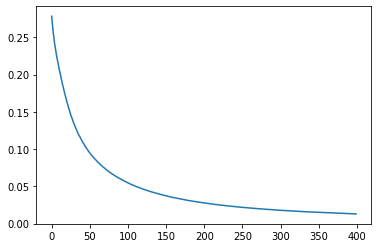

In [49]:
# 3.34 2-레이어 XOR 네트워크의 loss 변화를 선 그래프로 표시
import matplotlib.pyplot as plt
plt.plot(history.history['loss'])

# 가중치와 편향 값 알아보기

In [50]:
for weight in model.weights:
  print(weight)

<tf.Variable 'dense_5/kernel:0' shape=(2, 1) dtype=float32, numpy=
array([[3.7455707],
       [3.7458825]], dtype=float32)>
<tf.Variable 'dense_5/bias:0' shape=(1,) dtype=float32, numpy=array([-5.7185154], dtype=float32)>


In [51]:
model.weights[0]

<tf.Variable 'dense_5/kernel:0' shape=(2, 1) dtype=float32, numpy=
array([[3.7455707],
       [3.7458825]], dtype=float32)>

In [52]:
model.weights[1]

<tf.Variable 'dense_5/bias:0' shape=(1,) dtype=float32, numpy=array([-5.7185154], dtype=float32)>

# OR 게이트 구현

In [53]:
# tf.keras 를 이용한 OR 네트워크 계산
import numpy as np
x = np.array([[1, 1], [1, 0], [0, 1], [0, 0]])
y = np.array([[1], [1], [1], [0]])

model = tf.keras.Sequential([
      tf.keras.layers.Dense(units=1, activation='sigmoid', input_shape=(2,)),
])

model.compile(optimizer=tf.keras.optimizers.SGD(lr=0.3), loss='mse')
model.summary()

history = model.fit(x, y, epochs=400, batch_size=1)

Model: "sequential_6"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_6 (Dense)              (None, 1)                 3         
Total params: 3
Trainable params: 3
Non-trainable params: 0
_________________________________________________________________
Epoch 1/400
4/4 [==============================] - 0s 2ms/step - loss: 0.1581
Epoch 2/400
4/4 [==============================] - 0s 2ms/step - loss: 0.1470
Epoch 3/400
4/4 [==============================] - 0s 1ms/step - loss: 0.1387
Epoch 4/400
4/4 [==============================] - 0s 2ms/step - loss: 0.1322
Epoch 5/400
4/4 [==============================] - 0s 2ms/step - loss: 0.1274
Epoch 6/400
4/4 [==============================] - 0s 1ms/step - loss: 0.1229
Epoch 7/400
4/4 [==============================] - 0s 1ms/step - loss: 0.1191
Epoch 8/400
4/4 [==============================] - 0s 2ms/step - loss: 0.1155
Epoch 9/400
4/4 [=============

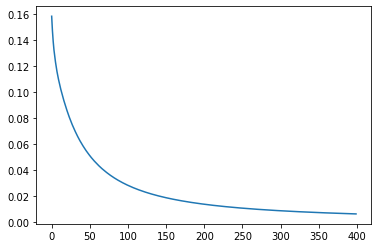

In [54]:
import matplotlib.pyplot as plt

plt.plot(history.history['loss'])

In [55]:
model.predict(x)

array([[0.9991164 ],
       [0.9259338 ],
       [0.92563164],
       [0.12096307]], dtype=float32)

In [56]:
for weight in model.weights:
  print(weight)

<tf.Variable 'dense_6/kernel:0' shape=(2, 1) dtype=float32, numpy=
array([[4.509184 ],
       [4.5047874]], dtype=float32)>
<tf.Variable 'dense_6/bias:0' shape=(1,) dtype=float32, numpy=array([-1.9833413], dtype=float32)>


# XOR 구현

In [59]:
# 3.27 tf.keras 를 이용한 XOR 네트워크 계산
import numpy as np
x = np.array([[1, 1], [1, 0], [0, 1], [0, 0]])
y = np.array([[0], [1], [1], [0]])

model = tf.keras.Sequential([
    tf.keras.layers.Dense(units=2, activation='sigmoid', input_shape=(2,)),
    tf.keras.layers.Dense(units=1, activation='sigmoid')
])

model.compile(optimizer=tf.keras.optimizers.SGD(lr=0.3), loss='mse')
model.summary()

# 3.28 tf.keras 를 이용한 XOR 네트워크 학습
history = model.fit(x, y, epochs=2000, batch_size=1)

# 3.29 tf.keras 를 이용한 XOR 네트워크 평가
print(model.predict(x))

# 3.30 XOR 네트워크의 가중치와 편향 확인
for weight in model.weights:
  print(weight)

Model: "sequential_9"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_11 (Dense)             (None, 2)                 6         
_________________________________________________________________
dense_12 (Dense)             (None, 1)                 3         
Total params: 9
Trainable params: 9
Non-trainable params: 0
_________________________________________________________________
Epoch 1/2000
4/4 [==============================] - 0s 2ms/step - loss: 0.2679
Epoch 2/2000
4/4 [==============================] - 0s 2ms/step - loss: 0.2661
Epoch 3/2000
4/4 [==============================] - 0s 2ms/step - loss: 0.2662
Epoch 4/2000
4/4 [==============================] - 0s 2ms/step - loss: 0.2658
Epoch 5/2000
4/4 [==============================] - 0s 1ms/step - loss: 0.2658
Epoch 6/2000
4/4 [==============================] - 0s 2ms/step - loss: 0.2657
Epoch 7/2000
4/4 [==============================

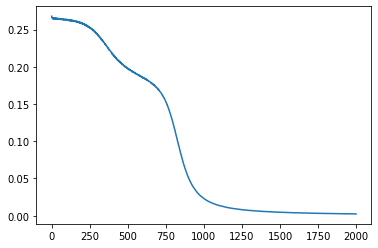

In [60]:
# 3.34 2-레이어 XOR 네트워크의 loss 변화를 선 그래프로 표시
import matplotlib.pyplot as plt

plt.plot(history.history['loss'])